# 🧠 Breast Cancer Diagnosis - ML Project

## 🎯 Objective
To build classification models that predict whether a tumor is **malignant (M)** or **benign (B)** using features extracted from digitized images of breast masses. The dataset includes measurements like radius, texture, smoothness, and concavity.

## 🔍 Research Question
Can we accurately diagnose breast cancer using a machine learning model based on tumor features?

## 📊 Dataset
- **Source:** [Breast Cancer Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data)
- **Samples:** 569
- **Target Variable:** `diagnosis` (1 = Malignant, 0 = Benign)

## 📚 Feature Descriptions

Each tumor is described by 30 numeric features derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. Features are computed for the mean, standard error (SE), and "worst" (largest) value. Here are some key features:

- **radius_mean**: Average distance from the center to points on the perimeter.
- **texture_mean**: Standard deviation of gray-scale values (texture).
- **perimeter_mean**: Length around the tumor boundary.
- **area_mean**: Approximate area of the tumor.
- **smoothness_mean**: Local variation in radius lengths.
- **compactness_mean**: Ratio of perimeter² to area — reflects roundness.
- **concavity_mean**: Severity of concave portions of the contour.
- **concave points_mean**: Number of concave portions.
- **symmetry_mean**: How symmetrical the tumor is.
- **fractal_dimension_mean**: "Roughness" or complexity of the contour.

Each of the above also has a:
- `_se` version: Standard error (e.g., `radius_se`)
- `_worst` version: Largest value recorded (e.g., `radius_worst`)

> Total: 30 features + 1 target (`diagnosis`) + 1 ID column

---

In [76]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the breast cancer dataset
df = pd.read_csv("data/breast-cancer.csv")  # Make sure the file is in the same directory

# Quick overview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

In [28]:
# Overview of dataset
df.shape
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [29]:
# Check for missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
# Check class distribution (Target variable)
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [31]:
# Drop unncessary columns
df = df.drop(columns=['id'])

# Convert 'diagnosis' to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [36]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlation matrix

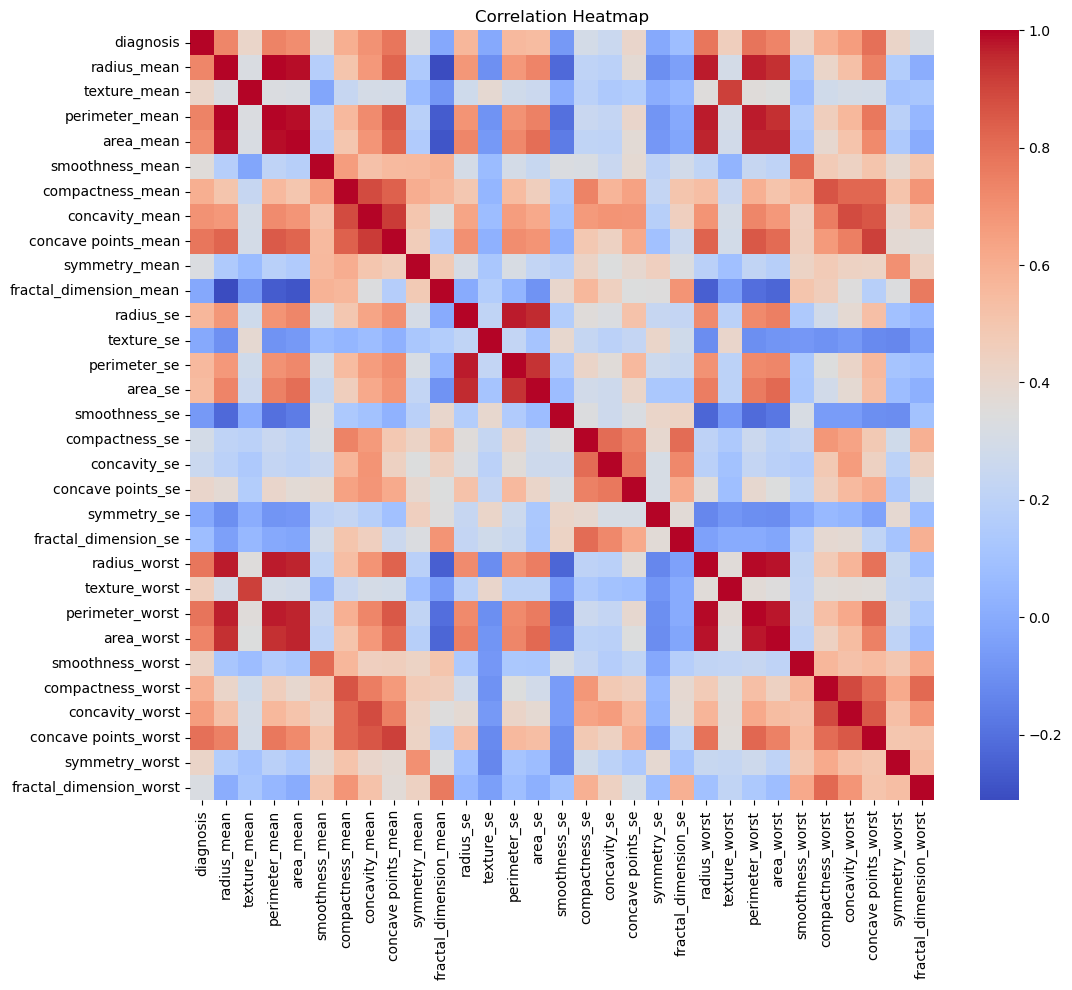

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64


In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

corr_target = corr["diagnosis"].sort_values(ascending=False)
print(corr_target.head(10))  # Top positive correlations
print(corr_target.tail(10))  # Top negative correlations


### Visualize distributions of key features

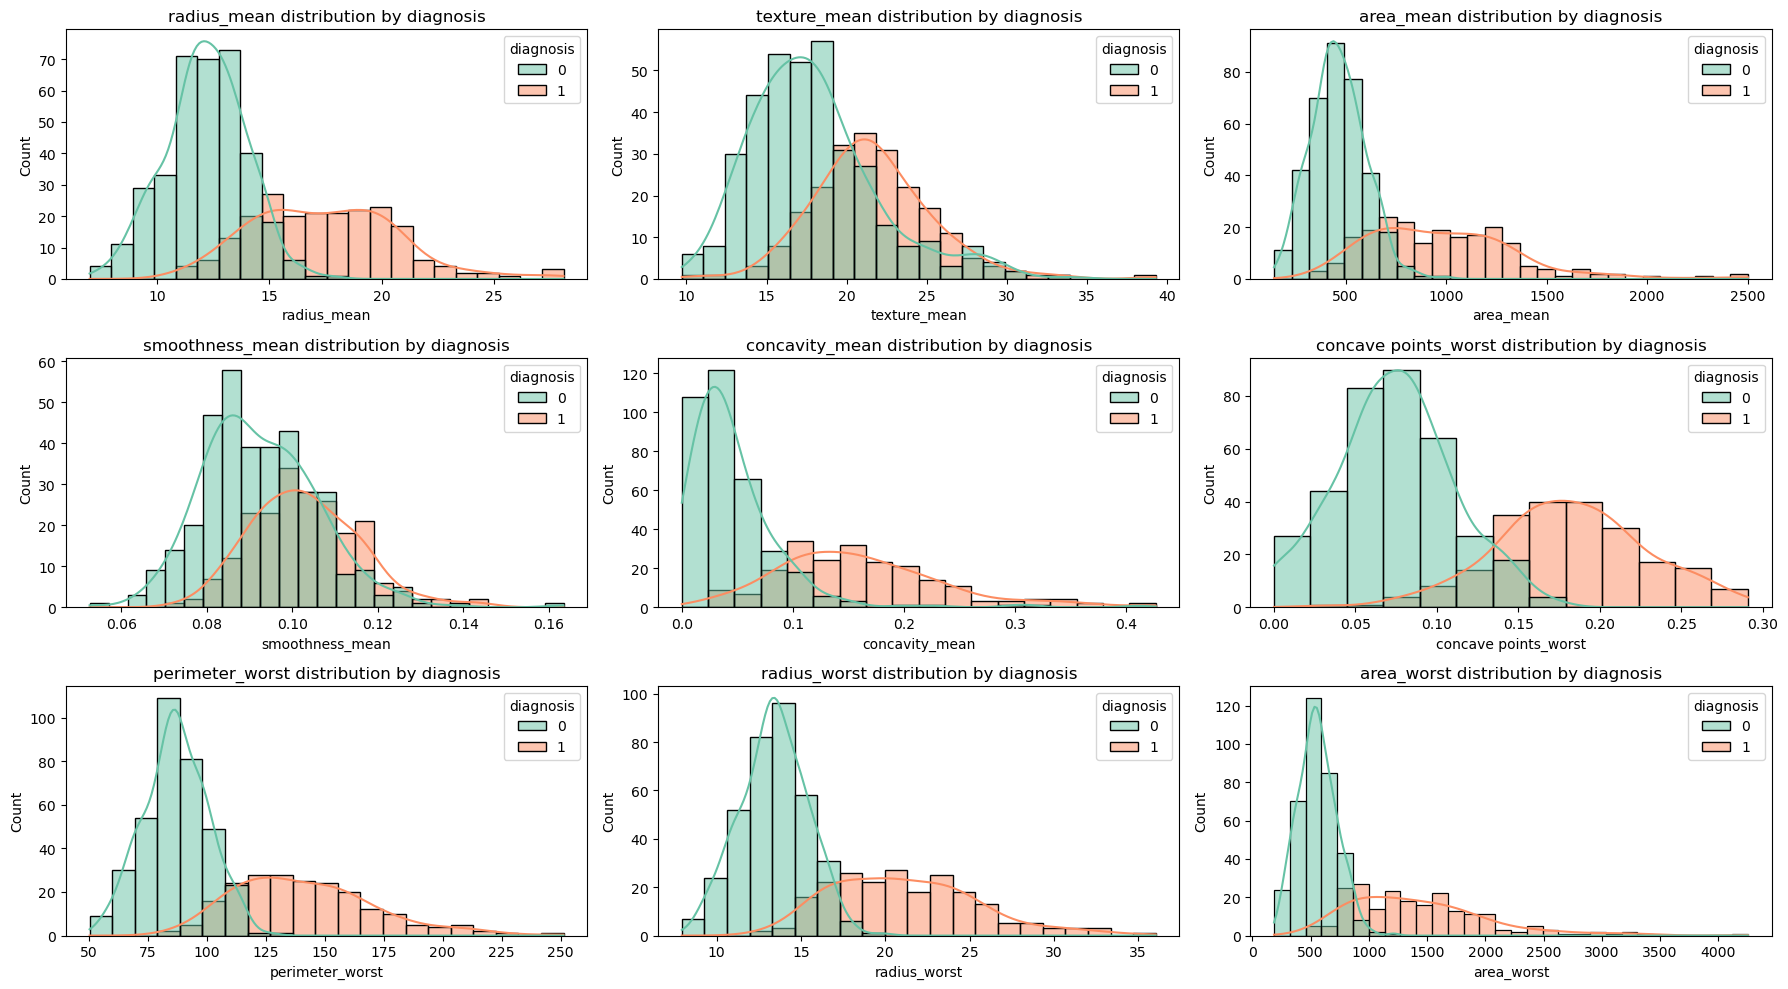

In [ ]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
            'concave points_worst', 'perimeter_worst', 'radius_worst', 'area_worst']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{feature} distribution by diagnosis")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Boxplots of key features

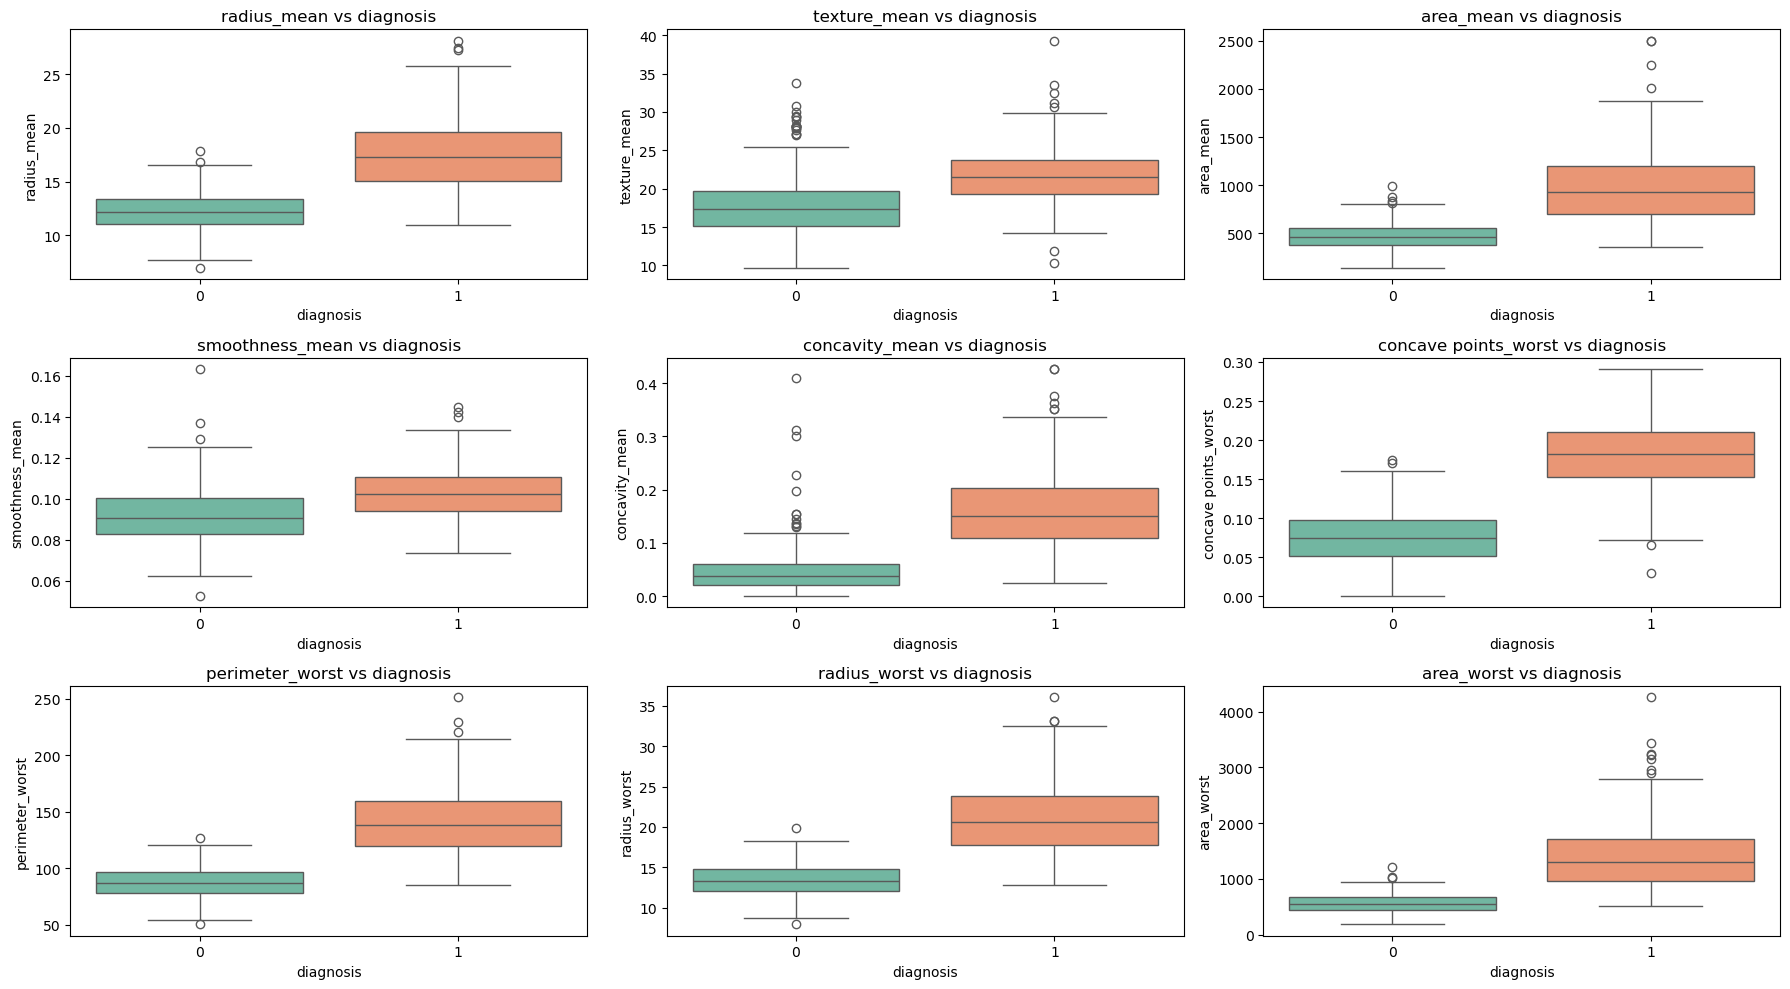

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{feature} vs diagnosis")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Prepare the data for modelling

In [52]:
# Define X (features) and y (target)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [58]:
# Scale the data
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
pd.DataFrame(X_train_scaled, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,-1.737316e-16,1.001101,-2.009730,-0.686986,-0.231061,0.494783,3.900239
texture_mean,455.0,3.904081e-16,1.001101,-2.265011,-0.719258,-0.120789,0.562843,4.634299
perimeter_mean,455.0,4.704418e-16,1.001101,-1.961360,-0.687765,-0.244467,0.497536,3.899731
area_mean,455.0,-1.171224e-16,1.001101,-1.433461,-0.664343,-0.314364,0.377537,5.114742
smoothness_mean,455.0,7.242070e-16,1.001101,-2.342455,-0.759968,-0.052676,0.623134,4.715773
compactness_mean,455.0,-5.075305e-17,1.001101,-1.568307,-0.744645,-0.214571,0.492380,4.485809
concavity_mean,455.0,-4.489693e-17,1.001101,-1.092835,-0.731107,-0.364967,0.527101,4.137033
concave points_mean,455.0,2.928061e-17,1.001101,-1.236420,-0.739855,-0.395400,0.632163,3.838961
symmetry_mean,455.0,2.342449e-17,1.001101,-2.733834,-0.704202,-0.057834,0.503438,4.435961
fractal_dimension_mean,455.0,3.669836e-16,1.001101,-1.791603,-0.729551,-0.203192,0.524949,4.987148


### Train multiple models

In [64]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

### Evaluate Each Model

In [69]:
for name, model in models.items():
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f" {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 55)

 Logistic Regression:
[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

-------------------------------------------------------
 Random Forest:
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

-------------------------------------------------------
 Decision Tree:
[[68  4]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1  

### Model comparison

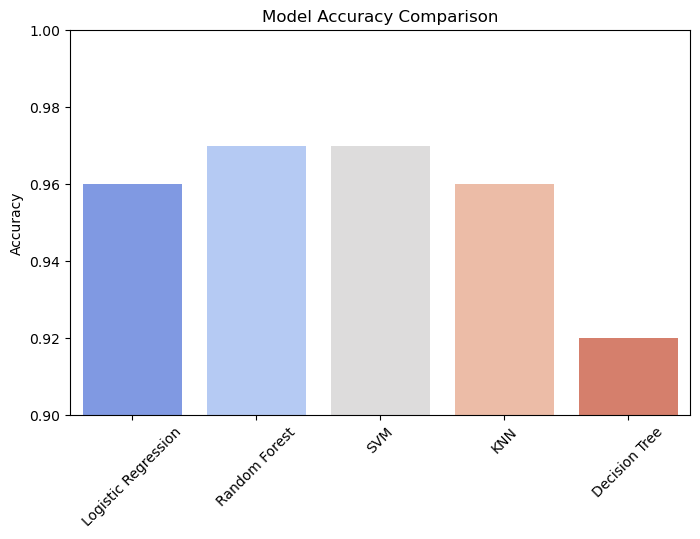

In [86]:
model_scores = {
    'Logistic Regression': 0.96,
    'Random Forest': 0.97,
    'SVM': 0.97,
    'KNN': 0.96,
    'Decision Tree': 0.92
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette='coolwarm')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1)
plt.xticks(rotation=45)
plt.show()

### Fine-tune the best model (Random Forest)

In [82]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='recall',
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("Best Hyperparameters:\n", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Evaluate tuned model

In [83]:
y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Feature importance analysis

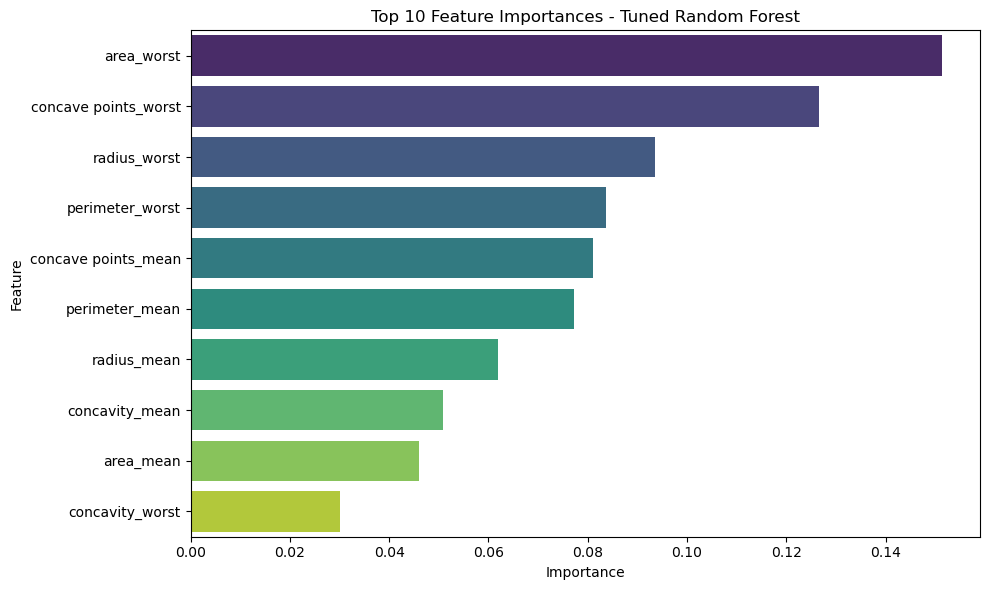

In [84]:
importances = best_rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances - Tuned Random Forest")
plt.tight_layout()
plt.show()

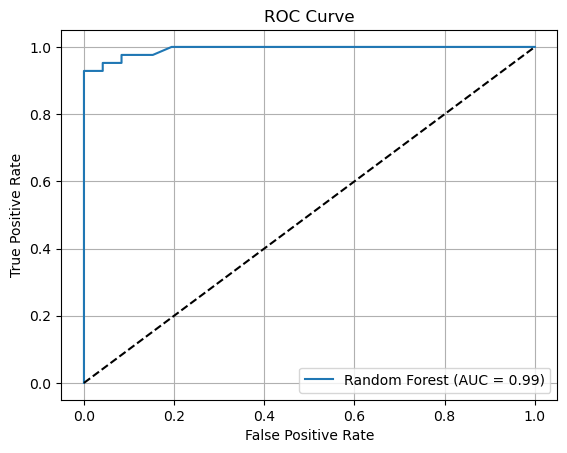

In [85]:
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()